# Determinant and Trace

## Determinant
The **determinant** of a square matrix is a scalar value that provides important information about the matrix, such as whether it is invertible, its volume scaling factor, and its orientation.

**Definition**  
For a **2×2 matrix**:
$$
A = \begin{bmatrix} a & b \\ c & d \end{bmatrix}
$$
The determinant is computed as:
$$
\det(A) = ad - bc
$$

For a **3×3 matrix**:
$$
A = \begin{bmatrix} a & b & c \\ d & e & f \\ g & h & i \end{bmatrix}
$$
The determinant is:
$$
\det(A) = a(ei - fh) - b(di - fg) + c(dh - eg)
$$

**Geometric Interpretation**  
- The determinant represents the **scaling factor** by which a linear transformation changes volume.
- If **det(A) = 0**, the transformation squashes space into a lower-dimensional subspace, meaning the matrix is **singular** (non-invertible).
- A **positive determinant** means the transformation **preserves orientation**, while a **negative determinant** means the transformation **reverses orientation**.

**Properties of Determinants**  
1. **Multiplicative Property**:
   $$
   \det(AB) = \det(A) \cdot \det(B)
   $$
2. **Determinant of an Inverse**:
   $$
   \det(A^{-1}) = \frac{1}{\det(A)}
   $$
3. **Determinant of a Transpose**:
   $$
   \det(A^T) = \det(A)
   $$

**Application in Machine Learning**  
- **Feature Space Transformations**: The determinant helps understand how transformations affect data spread.
- **Covariance Matrices in Gaussian Distributions**: The determinant of a covariance matrix determines the **spread** of a multivariate Gaussian distribution.
- **Singular Matrix Detection**: If a dataset contains redundant features, the determinant of its feature matrix is close to zero.

---

## Trace
The **trace** of a square matrix is the sum of its diagonal elements.

**Definition**  
For a **n×n matrix**:
$$
A = \begin{bmatrix} a_{11} & a_{12} & \cdots & a_{1n} \\ 
a_{21} & a_{22} & \cdots & a_{2n} \\ 
\vdots & \vdots & \ddots & \vdots \\ 
a_{n1} & a_{n2} & \cdots & a_{nn} 
\end{bmatrix}
$$
The trace is defined as:
$$
\text{Tr}(A) = a_{11} + a_{22} + \dots + a_{nn}
$$

**Geometric Interpretation**  
- The trace represents the **sum of the eigenvalues** of the matrix.
- In transformations, the trace measures **scaling effects** along principal axes.

**Properties of Trace**  
1. **Additive Property**:
   $$
   \text{Tr}(A + B) = \text{Tr}(A) + \text{Tr}(B)
   $$
2. **Trace of a Product**:
   $$
   \text{Tr}(AB) = \text{Tr}(BA)
   $$
3. **Trace and Eigenvalues**:
   If $ A $ has eigenvalues $ \lambda_1, \lambda_2, \dots, \lambda_n $, then:
   $$
   \text{Tr}(A) = \lambda_1 + \lambda_2 + \dots + \lambda_n
   $$

**Application in Machine Learning**  
- **PCA (Principal Component Analysis)**: The trace of a covariance matrix is the **total variance** in the data.
- **Loss Functions in ML**: Some loss functions involve the trace of a Gram matrix.
- **Quantum Computing & Signal Processing**: Trace operations are widely used in algorithms dealing with **Hermitian matrices**.

---

**Example Calculations**  
*Example 1: Determinant of a 3×3 Matrix*  
Given:
$$
A = \begin{bmatrix} 1 & 2 & 3 \\ 4 & 5 & 6 \\ 7 & 8 & 9 \end{bmatrix}
$$
The determinant is:
$$
\det(A) = 1(5 \cdot 9 - 6 \cdot 8) - 2(4 \cdot 9 - 6 \cdot 7) + 3(4 \cdot 8 - 5 \cdot 7)
$$
$$
= 1(-3) - 2(-6) + 3(-3) = -3 + 12 - 9 = 0
$$
Since the determinant is **0**, the matrix is **singular**.

*Example 2: Trace of a Matrix*  
Given:
$$
B = \begin{bmatrix} 2 & -1 & 0 \\ 1 & 3 & 4 \\ 5 & 6 & 7 \end{bmatrix}
$$
The trace is:
$$
\text{Tr}(B) = 2 + 3 + 7 = 12
$$

---

**Conclusion**  
- The **determinant** provides information about **volume scaling, invertibility, and orientation**.
- The **trace** provides insights into **sum of eigenvalues and transformation effects**.
- **Both are crucial** in ML applications, particularly in PCA, Gaussian distributions, and feature space transformations.



In [1]:
import numpy as np
A = np.array([[1, 2, 3],
              [4, 0, 6],
             [-2, 4, 9]])

det_A = np.linalg.det(A)
tr_A = np.trace(A)

print(f"The determinat of matrix A is: {det_A}")
print(f"The trace of matrix A is: {tr_A}")

The determinat of matrix A is: -72.0
The trace of matrix A is: 10


# Eigenvalues and Eigenvectors

**1. Introduction to Eigenvalues and Eigenvectors**  
Eigenvalues and eigenvectors are fundamental concepts in linear algebra with widespread applications in machine learning, physics, engineering, and computer science.

*What are Eigenvalues and Eigenvectors?*  
Given a **square matrix** $ A $, an **eigenvector** is a nonzero vector $ \mathbf{v} $ that, when multiplied by $ A $ , results in a **scaled version** of itself:

$$ A\mathbf{v} = \lambda \mathbf{v} $$

Here, 
- $ \mathbf{v} $ is the **eigenvector**,
- $ \lambda $ is the **eigenvalue**, which is a scalar.

This equation tells us that applying the transformation matrix $ A $ to the vector $ \mathbf{v} $ **does not change its direction**, only its magnitude.

*Why are Eigenvalues and Eigenvectors Important?*  
Eigenvalues and eigenvectors are used to:
- **Understand linear transformations**: They help analyze how a matrix transforms space.
- **Reduce dimensionality**: In **Principal Component Analysis (PCA)**, eigenvalues determine the most important directions for data variance.
- **Solve differential equations**: Many physical systems evolve based on eigenvalues.
- **Analyze Markov chains**: They help in Google's **PageRank algorithm** for ranking web pages.

*Real-World Applications in Machine Learning*  
- **Principal Component Analysis (PCA)**: Used in data compression and feature selection.
- **Singular Value Decomposition (SVD)**: Used in **image compression** and **recommender systems**.
- **Markov Processes**: Used in predicting sequences and **reinforcement learning**.
- **Graph Theory**: Eigenvectors are used in **network analysis**, such as finding communities in social networks.

---

**2. Mathematical Definition and Interpretation**  

*Eigenvalue Equation*  
The **eigenvalue equation** is:

$$ A\mathbf{v} = \lambda \mathbf{v} $$

For a **matrix** $ A $, we need to find **scalars** $ \lambda $ (eigenvalues) and **nonzero vectors** $ \mathbf{v} $ (eigenvectors) that satisfy this equation.

*Geometric Meaning of Eigenvalues and Eigenvectors*  
- **Eigenvectors** represent the **directions** along which a transformation occurs **without rotation**.
- **Eigenvalues** determine the **scaling factor** in those directions.

*Example: Scaling Transformation*  
If 

$$ A = \begin{bmatrix} 2 & 0 \\ 0 & 3 \end{bmatrix} $$

Then the eigenvectors of $ A $ are the standard basis vectors:

$$ \mathbf{v}_1 = \begin{bmatrix} 1 \\ 0 \end{bmatrix}, \quad \mathbf{v}_2 = \begin{bmatrix} 0 \\ 1 \end{bmatrix} $$

And their corresponding eigenvalues are $ \lambda_1 = 2 $ and $ \lambda_2 = 3 $, meaning:
- Any vector along the **x-axis** is scaled by **2**.
- Any vector along the **y-axis** is scaled by **3**.

This means that in **image processing or transformations**, such a matrix would stretch an image more in one direction than another.

*Visualizing Eigenvalues and Eigenvectors*  
Imagine a **deformation** of space:
- **Eigenvectors remain on the same line** after the transformation.
- **Eigenvalues describe the stretching or shrinking along these directions**.

*Example: Rotation Transformation*  
For a **rotation matrix**,

$$ A = \begin{bmatrix} 0 & -1 \\ 1 & 0 \end{bmatrix} $$

- There are **no real eigenvalues** because it **only rotates vectors** without scaling.
- The eigenvalues are **complex numbers** $ i $ and $ -i $, indicating a **pure rotation**.

---



**Computing Eigenvalues and Eigenvectors**

*Finding Eigenvalues*  
To compute the eigenvalues of a square matrix $A$, we solve the **characteristic equation**:

$$ \det(A - \lambda I) = 0 $$

where:  
- $A$ is an $n \times n$ matrix,  
- $I$ is the identity matrix of the same size,  
- $\lambda$ represents the **eigenvalues**.  

*Step-by-Step Process*  
1. Compute $A - \lambda I$ by subtracting $\lambda$ from the diagonal elements of $A$.  
2. Find the determinant of $A - \lambda I$.  
3. Solve the **characteristic equation** $\det(A - \lambda I) = 0$ for $\lambda$.  

*Example 1: Eigenvalues of a 2×2 Matrix*  
Let:

$$ A = \begin{bmatrix} 4 & 2 \\ 1 & 3 \end{bmatrix} $$

**Step 1: Compute $A - \lambda I$**  
Subtract $\lambda$ from the diagonal:

$$ A - \lambda I = \begin{bmatrix} 4-\lambda & 2 \\ 1 & 3-\lambda \end{bmatrix} $$

**Step 2: Compute Determinant**  
The determinant is:

$$ \det(A - \lambda I) = (4-\lambda)(3-\lambda) - (2 \cdot 1) = 0 $$

Expanding:

$$ (4-\lambda)(3-\lambda) - 2 = 12 - 4\lambda - 3\lambda + \lambda^2 - 2 = \lambda^2 - 7\lambda + 10 = 0 $$

**Step 3: Solve for $\lambda$**  
Factorizing:

$$ (\lambda - 5)(\lambda - 2) = 0 $$

So the eigenvalues are:

$$ \lambda_1 = 5, \quad \lambda_2 = 2 $$

---

*Finding Eigenvectors*  
For each eigenvalue $\lambda$, we solve:

$$ (A - \lambda I) \mathbf{v} = 0 $$

where $\mathbf{v}$ is the **eigenvector**.

*Example 2: Eigenvectors for $\lambda_1 = 5$*  
For $\lambda_1 = 5$, substitute into $A - \lambda I$:

$$ A - 5I = \begin{bmatrix} -1 & 2 \\ 1 & -2 \end{bmatrix} $$

Solve:

$$ \begin{bmatrix} -1 & 2 \\ 1 & -2 \end{bmatrix} \begin{bmatrix} x \\ y \end{bmatrix} = \begin{bmatrix} 0 \\ 0 \end{bmatrix} $$

From row 1:

$$ -x + 2y = 0 \Rightarrow x = 2y $$

Let $ y = t $, then:

$$ x = 2t $$

So the eigenvector is:

$$ \mathbf{v}_1 = \begin{bmatrix} 2 \\ 1 \end{bmatrix} $$

Any **scalar multiple** of this is also an eigenvector.

---

*Example 3: Eigenvectors for $\lambda_2 = 2$*  
For $\lambda_2 = 2$, compute:

$$ A - 2I = \begin{bmatrix} 2 & 2 \\ 1 & 1 \end{bmatrix} $$

Solving:

$$ \begin{bmatrix} 2 & 2 \\ 1 & 1 \end{bmatrix} \begin{bmatrix} x \\ y \end{bmatrix} = \begin{bmatrix} 0 \\ 0 \end{bmatrix} $$

From row 1:

$$ 2x + 2y = 0 \Rightarrow x = -y $$

Let $ y = t $, then:

$$ x = -t $$

Eigenvector:

$$ \mathbf{v}_2 = \begin{bmatrix} -1 \\ 1 \end{bmatrix} $$

---

*Summary of Computation*  
To compute eigenvalues and eigenvectors:  
1. **Find eigenvalues** by solving $ \det(A - \lambda I) = 0 $.  
2. **Find eigenvectors** by solving $ (A - \lambda I) \mathbf{v} = 0 $ for each eigenvalue.  

These concepts are crucial in:  
- **PCA (Principal Component Analysis)** to find principal directions in data.  
- **Spectral Clustering** in ML.  
- **Quantum Mechanics** to find stable states.  


In [2]:
import numpy as np
A = np.array([[4, 2],
              [1, 3]])
eigenvalues, eigenvectors = np.linalg.eig(A)
print(f'Eigenvalue = {eigenvalues[0]} and its corresponding eigenvector is {eigenvectors[:, 0]}')
print(f'Eigenvalue = {eigenvalues[1]} and its corresponding eigenvector is {eigenvectors[:, 1]}')

Eigenvalue = 5.0 and its corresponding eigenvector is [0.89442719 0.4472136 ]
Eigenvalue = 2.0 and its corresponding eigenvector is [-0.70710678  0.70710678]


**Defective and Non-Defective Square Matrices**

*Definition*  
A **square matrix** $A \in \mathbb{R}^{n \times n}$ is called:  
- **Non-defective (diagonalizable)** if it has a complete set of $n$ **linearly independent** eigenvectors, meaning it can be **diagonalized** as:

  $$ A = PDP^{-1} $$

  where $D$ is a diagonal matrix of eigenvalues and $P$ is an invertible matrix of eigenvectors.

- **Defective** if it does not have $n$ linearly independent eigenvectors, meaning it **cannot** be diagonalized.

---

**How to Identify a Defective Matrix**  
A matrix $A$ is **defective** if:  
1. One or more eigenvalues have fewer than $m$ linearly independent eigenvectors, where $m$ is the **algebraic multiplicity** (the number of times an eigenvalue appears in the characteristic equation).  
2. The number of **linearly independent eigenvectors** (called **geometric multiplicity**) is **less than** the algebraic multiplicity.  

Mathematically:  
- If for an eigenvalue $\lambda$, its geometric multiplicity:

  $$ \text{rank}(A - \lambda I) > n - m $$

  then the matrix is **defective**.

---

**Example 1: Non-Defective (Diagonalizable) Matrix**  

Consider:

$$ A = \begin{bmatrix} 4 & 2 \\ 1 & 3 \end{bmatrix} $$

1. **Find Eigenvalues**  
   Solve $\det(A - \lambda I) = 0$:

   $$ \begin{vmatrix} 4 - \lambda & 2 \\ 1 & 3 - \lambda \end{vmatrix} = 0 $$

   Expanding:

   $$ (4-\lambda)(3-\lambda) - (2 \cdot 1) = \lambda^2 - 7\lambda + 10 = 0 $$

   Solving for $\lambda$:

   $$ (\lambda - 5)(\lambda - 2) = 0 $$

   So the eigenvalues are **$\lambda_1 = 5$ and $\lambda_2 = 2$**.

2. **Find Eigenvectors**  
   For each eigenvalue, solve $(A - \lambda I) v = 0$. Each eigenvalue gives a **linearly independent eigenvector**, so this matrix is **non-defective**.

---

**Example 2: Defective Matrix**  

Consider:

$$ B = \begin{bmatrix} 1 & 1 \\ 0 & 1 \end{bmatrix} $$

1. **Find Eigenvalues**  
   Solve $\det(B - \lambda I) = 0$:

   $$ \begin{vmatrix} 1 - \lambda & 1 \\ 0 & 1 - \lambda \end{vmatrix} = 0 $$

   Expanding:

   $$ (1-\lambda)(1-\lambda) = (1-\lambda)^2 = 0 $$

   So the **only** eigenvalue is **$\lambda = 1$**, but it has **algebraic multiplicity 2**.

2. **Find Eigenvectors**  
   Solve:

   $$ (B - I) v = \begin{bmatrix} 0 & 1 \\ 0 & 0 \end{bmatrix} \begin{bmatrix} x \\ y \end{bmatrix} = \begin{bmatrix} 0 \\ 0 \end{bmatrix} $$

   This reduces to:

   $$ x + y = 0 $$

   Let $ y = t $, then $ x = -t $, so the **only** eigenvector is:

   $$ v = \begin{bmatrix} -1 \\ 1 \end{bmatrix} $$

   Since we **only found one eigenvector** (geometric multiplicity = 1), but the eigenvalue has **algebraic multiplicity = 2**, the matrix is **defective**.

---

**Key Takeaways**  
- **Non-defective (diagonalizable) matrices** have $n$ linearly independent eigenvectors and can be diagonalized.  
- **Defective matrices** do not have enough independent eigenvectors and **cannot be diagonalized**.  
- In **Machine Learning**, defective matrices appear in transition matrices, Markov Chains, and when analyzing stability in optimization problems.  


**Constructing a Symmetric, Positive Definite Matrix from Any Matrix**  

Given a matrix $A \in \mathbb{R}^{m \times n}$, we define:

$$ S := A^T A $$

where $S \in \mathbb{R}^{n \times n}$.

---

**1. Checking Symmetry**    
A matrix $S$ is symmetric if:

$$ S^T = S $$

Let's check:

$$ (A^T A)^T = A^T (A^T)^T = A^T A = S $$

Since $S^T = S$, the matrix $S$ is **always symmetric**.

---

**2. Checking Positive Definiteness**    
A matrix $S$ is **positive definite** if for any nonzero vector $x \in \mathbb{R}^n$:

$$ x^T S x > 0 $$

Substituting $S = A^T A$:

$$ x^T (A^T A) x = (A x)^T (A x) = \|A x\|^2 $$

Since the squared norm $\|A x\|^2$ is always **nonnegative** and only equals **zero** if $x = 0$, we conclude that:

- If $A$ has **full column rank** (i.e., its columns are linearly independent), then $\|A x\|^2 > 0$ for all $x \neq 0$, meaning **$S$ is positive definite**.  
- If $A$ does **not** have full column rank, $S$ may be **positive semi-definite** ($x^T S x \geq 0$ but can be zero for some nonzero $x$).

---

**3. Advantages of $S = A^T A$ in Machine Learning**  
1. **Covariance Matrices**  
   - In statistics and ML, the **sample covariance matrix** is given by:

     $$ \Sigma = \frac{1}{N} X^T X $$

     which is always symmetric and positive semi-definite.

2. **Principal Component Analysis (PCA)**  
   - PCA finds the eigenvectors of $A^T A$ to identify directions of **maximum variance** in data.

3. **Least Squares Regression**  
   - The normal equation for linear regression:

     $$ \theta = (X^T X)^{-1} X^T y $$

     relies on the **invertibility** of $X^T X$, which holds when $X^T X$ is positive definite.

4. **Quadratic Forms & Optimization**  
   - Many ML models involve **quadratic optimization problems**, where positive definiteness ensures a **unique global minimum**.

---


In [3]:
import numpy as np
A = np.array([[1, 2],
              [3, 4],
              [5, 6]])
S = A.T @ A
is_S_symmetric = np.allclose(S, S.T)

eigenvalues = np.linalg.eigvals(S)

is_a_positive_definite = np.all(eigenvalues > 0)


if is_S_symmetric and is_a_positive_definite:
    print("S is symmetric, positive definite matrix")

else:
    print("S is neither symmetric nor positive definite matrix")    

S is symmetric, positive definite matrix


In [4]:
S

array([[35, 44],
       [44, 56]])

**Spectral Theorem**  

Let $A \in \mathbb{R}^{n \times n}$ be a symmetric matrix. The **Spectral Theorem** states that:

- There exists an **orthonormal basis** of the vector space $V$ consisting of **eigenvectors** of $A$.
- Each eigenvalue of $A$ is **real**.

---

**Mathematical Formulation**  

If $A$ is symmetric, then we can decompose the matrix $A$ as:

$$ A = Q \Lambda Q^T $$

Where:

- $Q$ is an orthogonal matrix (i.e., $Q^T Q = I$) whose columns are the **normalized eigenvectors** of $A$.
- $\Lambda$ is a diagonal matrix containing the **real eigenvalues** of $A$.

Thus, symmetric matrices have **real eigenvalues** and are always diagonalizable by an orthonormal matrix.

---

**Geometric Interpretation**  

1. **Eigenvectors of Symmetric Matrices**  
   - The eigenvectors of a symmetric matrix are **mutually orthogonal**. This means that the geometric interpretation of the eigenvectors is that they represent **independent directions** in the vector space.

2. **Orthonormal Basis**  
   - The orthonormal basis constructed from these eigenvectors forms a **coordinate system** where the matrix $A$ acts **diagonally** on each of these directions.

3. **Real Eigenvalues**  
   - The fact that the eigenvalues are **real** means that they represent the **scaling factor** along each of the eigenvector directions, which is a crucial property for many **linear transformations** in real-valued vector spaces.

---

**Applications in Machine Learning**  

1. **Principal Component Analysis (PCA)**  
   - PCA is based on finding the eigenvectors of the covariance matrix of a dataset. Since the covariance matrix is symmetric, its eigenvectors form an **orthonormal basis** for the data space. The eigenvalues provide the **variance** along these directions, helping to reduce dimensions.

2. **Optimization Problems**  
   - In machine learning, particularly for algorithms like **support vector machines (SVM)** and **ridge regression**, symmetric matrices appear in the form of kernel matrices or regularization matrices. The spectral theorem ensures that we can diagonalize these matrices to find their eigenvalues and eigenvectors, which can aid in faster computations.

3. **Graph Theory**  
   - In graph-based learning, **Laplacian matrices** are symmetric, and their eigenvalues and eigenvectors are used in spectral clustering algorithms to partition graphs.

---



In [5]:
import numpy as np

# Symmetric matrix A
A = np.array([[4, 1], [1, 3]])

# Eigenvalues and eigenvectors
eigvals, eigvecs = np.linalg.eigh(A)

# Reconstruct the matrix from eigenvectors and eigenvalues
reconstructed_A = eigvecs @ np.diag(eigvals) @ eigvecs.T

print("Eigenvalues:", eigvals)
print("Eigenvectors:\n", eigvecs)
print("Reconstructed Matrix:\n", reconstructed_A)

# Check if the matrix is symmetric
is_symmetric = np.allclose(A, A.T)
print("Is A symmetric?", is_symmetric)

Eigenvalues: [2.38196601 4.61803399]
Eigenvectors:
 [[ 0.52573111 -0.85065081]
 [-0.85065081 -0.52573111]]
Reconstructed Matrix:
 [[4. 1.]
 [1. 3.]]
Is A symmetric? True


**Eigenvalues, Eigenvectors, Determinant, and Trace**

Before concluding our exploration of eigenvalues and eigenvectors, it is useful to understand how these concepts are tied together with the **determinant** and the **trace** of a matrix. These properties provide further insight into the matrix’s behavior and its relationship with its eigenvalues.

---

**Determinant and Eigenvalues**  

The **determinant** of a square matrix $A$, denoted by $det(A)$, is closely related to the **product** of the eigenvalues of $A$. Specifically, if $A$ is a square matrix with eigenvalues $\lambda_1, \lambda_2, \dots, \lambda_n$, the determinant of $A$ is given by:

$$ det(A) = \prod_{i=1}^n \lambda_i $$

This means that the determinant is equal to the product of all the eigenvalues of the matrix.

**Geometric Interpretation**:  
The determinant gives the scaling factor by which the matrix transforms space. When the determinant is zero, the matrix is singular (i.e., it has no inverse), and this indicates that one or more eigenvalues must be zero, meaning the matrix squashes space into a lower-dimensional subspace.

---

**Trace and Eigenvalues**  

The **trace** of a matrix $A$, denoted by $tr(A)$, is the sum of its diagonal elements. For a square matrix $A$ with eigenvalues $\lambda_1, \lambda_2, \dots, \lambda_n$, the trace is given by:

$$ tr(A) = \sum_{i=1}^n \lambda_i $$

Thus, the trace of a matrix is equal to the sum of its eigenvalues.

**Geometric Interpretation**:  
The trace gives the cumulative scaling effect along the principal directions (the eigenvectors). If the trace is zero, the matrix does not scale space in any overall way, and it indicates that the matrix’s eigenvalues sum to zero.

---

**Relation between Determinant, Trace, and Eigenvalues**  

From the above, we see that:

- The **determinant** is the **product** of the eigenvalues.
- The **trace** is the **sum** of the eigenvalues.

These properties allow us to gain deeper insights into the matrix’s structure just from its eigenvalues. For example, knowing that the determinant is zero implies that at least one eigenvalue is zero. Similarly, if the trace is zero, the eigenvalues must sum to zero.

---


In [6]:
import numpy as np

# Example matrix A
A = np.array([[4, 1], [1, 3]])

# Eigenvalues and eigenvectors
eigvals, eigvecs = np.linalg.eigh(A)

# Compute determinant and trace
det_A = np.linalg.det(A)
trace_A = np.trace(A)
product_of_eigvals = np.prod(eigvals)
sum_of_eigvals = np.sum(eigvals)

# Display results
print("Eigenvalues:", eigvals)
print("Determinant of A:", det_A)
print("Product of Eigenvalues", product_of_eigvals)
print("Trace of A:", trace_A)
print("Sum of Eigenvalues", sum_of_eigvals)

Eigenvalues: [2.38196601 4.61803399]
Determinant of A: 11.000000000000002
Product of Eigenvalues 11.0
Trace of A: 7
Sum of Eigenvalues 7.0


# Cholesky Decomposition

Cholesky decomposition is a matrix factorization technique that is used to decompose a positive-definite matrix into a product of a lower triangular matrix and its conjugate transpose. Specifically, for a matrix $A$, the Cholesky decomposition finds a matrix $L$ such that:

$$ A = L L^T $$

where $L$ is a lower triangular matrix and $L^T$ is its transpose. This decomposition is particularly useful for solving systems of linear equations, simulating random variables with a multivariate normal distribution, and is widely used in optimization and machine learning.

---

**Conditions for Cholesky Decomposition**  

For a matrix to have a Cholesky decomposition, it must satisfy two conditions:
1. **Symmetry**: The matrix $A$ must be symmetric, i.e., $A = A^T$.
2. **Positive Definiteness**: The matrix must be positive definite. This means that for any non-zero vector $x$, the quadratic form $x^T A x$ must be strictly positive.

If a matrix is not positive definite, it does not have a real Cholesky decomposition.

---

**Geometric Interpretation**  

Cholesky decomposition is essentially a way to transform a matrix into a product of simpler matrices, with one matrix being a lower triangular matrix. This lower triangular matrix represents a transformation that scales and rotates space, but in a way that avoids negative or non-definite transformations. The resulting decomposition helps in understanding how a matrix stretches or compresses space along different axes.

---

**Computational Example**  

Consider a symmetric, positive-definite matrix $A$:

$$ A = \begin{bmatrix} 4 & 2 \\ 2 & 3 \end{bmatrix} $$

We aim to decompose this matrix into the product of a lower triangular matrix $L$ and its transpose $L^T$. The Cholesky decomposition gives us:

$$ A = L L^T $$

In this case, the decomposition would yield:

$$ L = \begin{bmatrix} 2 & 0 \\ 1 & \sqrt{2} \end{bmatrix} $$

So, $A$ can be written as:

$$ A = \begin{bmatrix} 2 & 0 \\ 1 & \sqrt{2} \end{bmatrix} \begin{bmatrix} 2 & 1 \\ 0 & \sqrt{2} \end{bmatrix} $$

---

**Applications of Cholesky Decomposition**  

1. **Solving Linear Systems**:
   Cholesky decomposition is widely used to solve systems of linear equations, particularly when the matrix is symmetric and positive-definite. Solving $A x = b$ involves:
   - Decompose $A$ into $L$ and $L^T$: $A = L L^T$.
   - Solve $L y = b$ for $y$ using forward substitution.
   - Solve $L^T x = y$ for $x$ using backward substitution.

2. **Multivariate Normal Distribution**:
   In machine learning, Cholesky decomposition is used to sample from a multivariate normal distribution. If we want to sample from a distribution with mean vector $\mu$ and covariance matrix $\Sigma$, the Cholesky decomposition of $\Sigma$ allows us to transform independent normal samples into correlated samples. The formula is:

   $$ x = \mu + Lz $$

   where $L$ is the Cholesky factor of $\Sigma$, and $z$ is a vector of independent standard normal random variables.

3. **Optimization**:
   In optimization problems, particularly those involving quadratic forms, Cholesky decomposition can be used to efficiently compute the inverse of a matrix or to solve the normal equations arising from least squares problems.

4. **Numerical Stability**:
   Cholesky decomposition is numerically stable and efficient for solving problems that involve symmetric, positive-definite matrices, as it avoids the need for matrix inversion.

---

**Computational Efficiency**  

The Cholesky decomposition is computationally more efficient than other methods such as LU decomposition for symmetric, positive-definite matrices. While LU decomposition has a time complexity of $O(n^3)$, Cholesky decomposition has a time complexity of $O(n^3/3)$, which makes it faster for large matrices.

---

In [7]:
import numpy as np
A = np.array([[4, 2],
              [2, 5]])

L = np.linalg.cholesky(A)
print(f"The lower triangular matrix L: \n{L}")

A_reconstructed = L @ L.T
print("A as the product of L and L.T: ")
print(A_reconstructed)

The lower triangular matrix L: 
[[2. 0.]
 [1. 2.]]
A as the product of L and L.T: 
[[4. 2.]
 [2. 5.]]


In [8]:
# Let's solve system of linear equation
A = np.array([[4, 2],
              [2, 5]])
b = np.array([6, 9])

x, y = np.linalg.solve(A, b)
print(f"x = {x}")
print(f"y = {y}")

x = 0.75
y = 1.5


In [9]:
# Let's use chelosky decomposition
A = np.array([[4, 2],
              [2, 5]])
b = np.array([6, 9])

L = np.linalg.cholesky(A)

y = np.linalg.solve(L, b)
x = np.linalg.solve(L.T, y)
print(f"x = {x}") # solution

x = [0.75 1.5 ]


In [10]:
# Generating Correlated Random Variables
import numpy as np
A = np.array([[4, 2],
              [2, 5]])
L = np.linalg.cholesky(A)

np.random.seed(0)
z = np.random.normal(size = (2, 1000))
x = L @ z
np.cov(x)

array([[3.90083866, 1.82986079],
       [1.82986079, 4.60773923]])

# Diagonal Matrices

A **diagonal matrix** is a square matrix in which all the non-diagonal elements are zero. That is, a matrix $D \in \mathbb{R}^{n \times n}$ is diagonal if:

$$ D = \begin{bmatrix} d_1 & 0 & 0 & \dots & 0 \\ 0 & d_2 & 0 & \dots & 0 \\ 0 & 0 & d_3 & \dots & 0 \\ \vdots & \vdots & \vdots & \ddots & \vdots \\ 0 & 0 & 0 & \dots & d_n \end{bmatrix} $$

where the elements $d_1, d_2, \dots, d_n$ on the main diagonal may be nonzero, but all off-diagonal elements are zero.

---

**Properties of Diagonal Matrices**  
*1. Addition and Subtraction*  
If $D_1$ and $D_2$ are diagonal matrices of the same size:

$$ D_1 = \begin{bmatrix} d_{11} & 0 \\ 0 & d_{22} \end{bmatrix}, \quad D_2 = \begin{bmatrix} e_{11} & 0 \\ 0 & e_{22} \end{bmatrix} $$

Then their sum or difference is also a diagonal matrix:

$$ D_1 + D_2 = \begin{bmatrix} d_{11} + e_{11} & 0 \\ 0 & d_{22} + e_{22} \end{bmatrix} $$

$$ D_1 - D_2 = \begin{bmatrix} d_{11} - e_{11} & 0 \\ 0 & d_{22} - e_{22} \end{bmatrix} $$

This means that the set of diagonal matrices forms a **vector space**.

---

*2. Multiplication of Diagonal Matrices*  
If $D_1$ and $D_2$ are diagonal matrices, their product is also diagonal:

$$ D_1 D_2 = \begin{bmatrix} d_{11} & 0 \\ 0 & d_{22} \end{bmatrix} \begin{bmatrix} e_{11} & 0 \\ 0 & e_{22} \end{bmatrix} = \begin{bmatrix} d_{11} e_{11} & 0 \\ 0 & d_{22} e_{22} \end{bmatrix} $$

This property makes diagonal matrices easy to compute with.

---

*3. Scalar Multiplication*
For a scalar $\alpha$:

$$ \alpha D = \alpha \begin{bmatrix} d_1 & 0 & \dots & 0 \\ 0 & d_2 & \dots & 0 \\ \vdots & \vdots & \ddots & \vdots \\ 0 & 0 & \dots & d_n \end{bmatrix} = \begin{bmatrix} \alpha d_1 & 0 & \dots & 0 \\ 0 & \alpha d_2 & \dots & 0 \\ \vdots & \vdots & \ddots & \vdots \\ 0 & 0 & \dots & \alpha d_n \end{bmatrix} $$

---

*4. Matrix Powers*  
Since diagonal matrices have simple multiplication rules, taking powers is straightforward:

$$ D^k = \begin{bmatrix} d_1^k & 0 & \dots & 0 \\ 0 & d_2^k & \dots & 0 \\ \vdots & \vdots & \ddots & \vdots \\ 0 & 0 & \dots & d_n^k \end{bmatrix} $$

For example, if:

$$ D = \begin{bmatrix} 2 & 0 \\ 0 & 3 \end{bmatrix}, \quad D^2 = \begin{bmatrix} 4 & 0 \\ 0 & 9 \end{bmatrix} $$

---

*5. Inverse of a Diagonal Matrix*  
A diagonal matrix is **invertible** if and only if all its diagonal elements are nonzero. The inverse of a diagonal matrix is given by:

$$ D^{-1} = \begin{bmatrix} \frac{1}{d_1} & 0 & \dots & 0 \\ 0 & \frac{1}{d_2} & \dots & 0 \\ \vdots & \vdots & \ddots & \vdots \\ 0 & 0 & \dots & \frac{1}{d_n} \end{bmatrix} $$

For example, if:

$$ D = \begin{bmatrix} 2 & 0 \\ 0 & 5 \end{bmatrix} $$

Then its inverse is:

$$ D^{-1} = \begin{bmatrix} \frac{1}{2} & 0 \\ 0 & \frac{1}{5} \end{bmatrix} $$

---

*6. Determinant of a Diagonal Matrix*  
The determinant of a diagonal matrix is simply the product of its diagonal entries:

$$ \det(D) = d_1 d_2 \cdots d_n $$

For example:

$$ D = \begin{bmatrix} 4 & 0 \\ 0 & 7 \end{bmatrix}, \quad \det(D) = 4 \times 7 = 28 $$

---

*7. Trace of a Diagonal Matrix*  
The trace of a diagonal matrix is the sum of its diagonal elements:

$$ \text{tr}(D) = d_1 + d_2 + \dots + d_n $$

For example:

$$ D = \begin{bmatrix} 3 & 0 \\ 0 & 5 \end{bmatrix}, \quad \text{tr}(D) = 3 + 5 = 8 $$

---

**Geometric Interpretation**  
Diagonal matrices represent scaling transformations along coordinate axes. If we apply a diagonal matrix $D$ to a vector:

$$ D v = \begin{bmatrix} d_1 & 0 \\ 0 & d_2 \end{bmatrix} \begin{bmatrix} x \\ y \end{bmatrix} = \begin{bmatrix} d_1 x \\ d_2 y \end{bmatrix} $$

It scales the $x$-coordinate by $d_1$ and the $y$-coordinate by $d_2$. In 3D and higher dimensions, diagonal matrices perform axis-aligned scaling transformations.

---

**Applications of Diagonal Matrices in Machine Learning**  
1. **Principal Component Analysis (PCA)**: PCA involves eigendecomposition, where the covariance matrix is diagonalized.
2. **Singular Value Decomposition (SVD)**: In SVD, singular values appear as a diagonal matrix, simplifying computations.
3. **Diagonal Covariance Matrices in Gaussian Distributions**: Used in probabilistic models to indicate independent features.
4. **Optimization and Gradient Descent**: Diagonal matrices help simplify computations in optimization problems.


# Eigendecomposition and Diagonalization

Eigendecomposition is a fundamental matrix factorization technique that expresses a matrix in terms of its eigenvalues and eigenvectors. If a square matrix $A$ can be decomposed as:

$$ A = P D P^{-1} $$

where:
- $P$ is a matrix whose columns are the eigenvectors of $A$,
- $D$ is a diagonal matrix whose diagonal elements are the eigenvalues of $A$,
- $P^{-1}$ is the inverse of $P$,

then $A$ is said to be **diagonalizable**.

This decomposition is useful in simplifying matrix computations, solving differential equations, and in various applications in machine learning and data science.

---

**When is a Matrix Diagonalizable?**  
A matrix $A \in \mathbb{R}^{n \times n}$ is **diagonalizable** if and only if there exists a basis of $\mathbb{R}^n$ consisting of its eigenvectors. This means that:
1. The matrix $A$ has $n$ **linearly independent** eigenvectors.
2. The geometric multiplicity of each eigenvalue (the number of independent eigenvectors corresponding to that eigenvalue) matches its algebraic multiplicity (the number of times the eigenvalue appears in the characteristic equation).

If $A$ has $n$ distinct eigenvalues, then it is always diagonalizable.

---

**Geometric Interpretation**  
Diagonalization transforms a complex linear transformation into a simpler form by aligning the transformation along independent directions (eigenvectors). This allows for:
- Easier computation of matrix powers: $A^k = P D^k P^{-1}$, where $D^k$ is simply raising each eigenvalue in $D$ to the power of $k$.
- Efficient computations in differential equations and dynamical systems.
- Principal Component Analysis (PCA) in machine learning, which uses eigendecomposition to project data onto principal axes.

---

**Computing the Eigendecomposition**  

*Step 1: Compute the Eigenvalues*  
The eigenvalues $\lambda$ of a matrix $A$ satisfy the **characteristic equation**:

$$ \det(A - \lambda I) = 0 $$

where $I$ is the identity matrix of the same dimension as $A$.

*Step 2: Compute the Eigenvectors*  
For each eigenvalue $\lambda$, solve the equation:

$$ (A - \lambda I)x = 0 $$

to find the corresponding eigenvector $x$.

*Step 3: Form Matrices $P$ and $D$*  
- Construct $P$ by placing the eigenvectors as columns.
- Construct $D$ as a diagonal matrix with eigenvalues on the diagonal.

---

**Example: Eigendecomposition of a Matrix**  
Consider the matrix:

$$ A = \begin{bmatrix} 4 & 1 \\ 6 & 3 \end{bmatrix} $$

*Step 1: Compute the Eigenvalues*
Solve:

$$ \det(A - \lambda I) = 0 $$

$$ \begin{vmatrix} 4 - \lambda & 1 \\ 6 & 3 - \lambda \end{vmatrix} = 0 $$

Expanding the determinant:

$$ (4 - \lambda)(3 - \lambda) - (1 \cdot 6) = 0 $$

$$ 12 - 4\lambda - 3\lambda + \lambda^2 - 6 = 0 $$

$$ \lambda^2 - 7\lambda + 6 = 0 $$

Solving for $\lambda$:

$$ (\lambda - 6)(\lambda - 1) = 0 $$

Thus, the eigenvalues are $\lambda_1 = 6$ and $\lambda_2 = 1$.

*Step 2: Compute the Eigenvectors*  
For $\lambda_1 = 6$:

$$ (A - 6I)x = 0 $$

$$ \begin{bmatrix} -2 & 1 \\ 6 & -3 \end{bmatrix} \begin{bmatrix} x_1 \\ x_2 \end{bmatrix} = \begin{bmatrix} 0 \\ 0 \end{bmatrix} $$

Solving, we get $x_1 = \frac{x_2}{2}$, so one eigenvector is:

$$ v_1 = \begin{bmatrix} 1 \\ 2 \end{bmatrix} $$

For $\lambda_2 = 1$:

$$ (A - I)x = 0 $$

$$ \begin{bmatrix} 3 & 1 \\ 6 & 2 \end{bmatrix} \begin{bmatrix} x_1 \\ x_2 \end{bmatrix} = \begin{bmatrix} 0 \\ 0 \end{bmatrix} $$

Solving, we get $x_1 = -x_2/3$, so another eigenvector is:

$$ v_2 = \begin{bmatrix} -1 \\ 3 \end{bmatrix} $$

*Step 3: Construct $P$ and $D$*  
The eigenvector matrix:

$$ P = \begin{bmatrix} 1 & -1 \\ 2 & 3 \end{bmatrix} $$

The diagonal matrix:

$$ D = \begin{bmatrix} 6 & 0 \\ 0 & 1 \end{bmatrix} $$

Thus, we have the eigendecomposition:

$$ A = P D P^{-1} $$

---

**Applications of Eigendecomposition in Machine Learning**  
1. **Principal Component Analysis (PCA)**: PCA uses eigendecomposition to find the principal components of a dataset, which are the eigenvectors of the covariance matrix. These components help in dimensionality reduction.
2. **Spectral Clustering**: Clustering algorithms leverage eigendecomposition to analyze the structure of similarity graphs.
3. **Google PageRank**: The ranking algorithm is based on the dominant eigenvector of the link matrix.
4. **Graph Laplacians in Deep Learning**: Eigendecomposition is used in graph neural networks (GNNs) to analyze connectivity structures.

---

**Advantages of Diagonalization**  
- Simplifies matrix exponentiation and inversion.
- Enables efficient computation of matrix functions such as exponentials and logarithms.
- Useful in machine learning applications for dimensionality reduction.

**Limitations**  
- Not all matrices are diagonalizable (e.g., defective matrices with fewer than $n$ linearly independent eigenvectors).
- Computationally expensive for large matrices.


In [11]:
# Importing necessary libraries
import numpy as np

# Create a matrix A 2x2 size
A = np.array([[4, 1],
              [1, 4]])

# Find the eigenvalues and eigenvectors of matrix A
eigvals, eigvecs = np.linalg.eig(A)

# Creating diagonal matrices from eigenvalues as diagonal elements
D = np.diag(eigvals)

# Crating matrix P from eigenvectors and its inverse matrix
P = eigvecs
P_inverse = np.linalg.inv(P)

# Display the three decomposed matrices
print(f"\nP = \n{P}")
print(f"\nD = \n{D}")
print(f"\nP^-1 = \n{P_inverse}")

# Check for A
A_check = P @ D @ P_inverse
print(f"\nA as a composition of the three matrices = \n{A_check}")


P = 
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]

D = 
[[5. 0.]
 [0. 3.]]

P^-1 = 
[[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]

A as a composition of the three matrices = 
[[4. 1.]
 [1. 4.]]


# Singular Value Decomposition (SVD)

Singular Value Decomposition (SVD) is a fundamental matrix factorization technique in linear algebra, widely used in machine learning, statistics, and data science. Given an $m \times n$ matrix $A$, SVD decomposes it into three matrices:

$$ A = U \Sigma V^T $$

where:
- $U$ is an $m \times m$ **orthogonal matrix** (columns are left singular vectors),
- $\Sigma$ is an $m \times n$ **diagonal matrix** (containing singular values),
- $V^T$ is an $n \times n$ **orthogonal matrix** (rows are right singular vectors).

---

***1. Understanding the Components***   
**Left Singular Vectors ($U$)**  
The columns of $U$ are **orthonormal eigenvectors** of $AA^T$. They represent the directions of maximum variance in the row space of $A$.

**Singular Values ($\Sigma$)**  
The diagonal entries of $\Sigma$ are the square roots of the **eigenvalues** of $A^T A$. These values represent the scaling factors along the principal directions of the data.

**Right Singular Vectors ($V$)**  
The columns of $V$ (or rows of $V^T$) are **orthonormal eigenvectors** of $A^T A$. They represent the directions of maximum variance in the column space of $A$.

---

***2. Geometric Interpretation***
SVD can be seen as a transformation that:
1. Rotates the input space via $V^T$,
2. Scales along the principal axes via $\Sigma$,
3. Rotates again via $U$.

For any vector $x$ in the column space of $A$:

$$ Ax = U \Sigma V^T x $$

This means that the action of $A$ on $x$ involves rotating it, scaling it along key directions, and then rotating it again.

---

***3. Applications of SVD in Machine Learning***    
**1. Dimensionality Reduction (PCA)**    
In **Principal Component Analysis (PCA)**, SVD helps reduce high-dimensional data by selecting the top $k$ singular values, allowing us to approximate $A$ with a lower-rank representation:

$$ A_k = U_k \Sigma_k V_k^T $$

where $k < \min(m, n)$.

**2. Image Compression**    
By keeping only the largest singular values, we can store a compressed version of an image while maintaining most of its structure.

**3. Noise Reduction**    
Truncating small singular values removes noise from data, improving signal clarity in applications like speech processing.

**4. Recommender Systems**    
In collaborative filtering (e.g., Netflix recommendations), SVD helps extract latent features from user-item interactions.

---

***4. Example: Computing SVD of a 2×2 Matrix***  
Consider:

$$ A = \begin{bmatrix} 3 & 1 \\ 2 & 4 \end{bmatrix} $$

Using SVD, we can decompose it into:

$$ U = \begin{bmatrix} -0.6 & -0.8 \\ -0.8 & 0.6 \end{bmatrix}, \quad
\Sigma = \begin{bmatrix} 5 & 0 \\ 0 & 2 \end{bmatrix}, \quad
V^T = \begin{bmatrix} -0.8 & -0.6 \\ 0.6 & -0.8 \end{bmatrix} $$

Thus:

$$ A = U \Sigma V^T $$

This decomposition allows us to analyze $A$ more efficiently.

---

***5. Low-Rank Approximation using SVD***  
If we want to approximate $A$ with lower rank $k$, we discard small singular values:

$$ A_k = U_k \Sigma_k V_k^T $$

where:
- $U_k$ contains the first $k$ left singular vectors,
- $\Sigma_k$ contains the first $k$ singular values,
- $V_k$ contains the first $k$ right singular vectors.

For example, if we keep only the largest singular value from $\Sigma$, we get a **rank-1 approximation** of $A$.

---

***Conclusion***  
Singular Value Decomposition (SVD) is one of the most powerful matrix decompositions in linear algebra. It provides deep insights into data structure, enables dimensionality reduction, and is widely used in practical machine learning applications such as PCA, image compression, and recommender systems.


In [12]:
import numpy as np
A = np.array([[3, 0],
              [0,-2]])
u, s, v_T = np.linalg.svd(A)
print(f"U = \n{u}")
print(f"S = \n{np.diag(s)}")
print(f"V.T = \n{v_T}")

U = 
[[1. 0.]
 [0. 1.]]
S = 
[[3. 0.]
 [0. 2.]]
V.T = 
[[ 1.  0.]
 [-0. -1.]]


In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Define a grayscale image as a matrix
A = np.array([[255, 0, 0],
              [0, 128, 0],
              [0, 0, 64]], dtype=np.float32)

# Perform SVD
U, S, VT = np.linalg.svd(A)

k = 2
u_k = U[:, :k]
s_k = np.diag(S[:k])
vT_k = VT[:k, :]
vT_k

array([[1., 0., 0.],
       [0., 1., 0.]], dtype=float32)

# Matrix Approximation 

Matrix approximation is a fundamental technique used in dimensionality reduction, data compression, and noise filtering. The goal is to find a lower-rank representation of a given matrix while preserving as much important information as possible.

---

**1. Why Approximate a Matrix?**  
In many real-world applications, we deal with large, high-dimensional data matrices. Approximating these matrices with a lower-rank representation helps in:
- **Reducing storage requirements**
- **Speeding up computations**
- **Denoising and extracting important patterns**
- **Compressing data for efficient processing**

---

**2. Low-Rank Approximation using SVD**  
The best way to approximate a matrix is by using **Singular Value Decomposition (SVD)**. Given an $m \times n$ matrix $A$, its SVD is:

$$ A = U \Sigma V^T $$

where:
- $U$ is an $m \times m$ **orthogonal matrix** (left singular vectors),
- $\Sigma$ is an $m \times n$ **diagonal matrix** (singular values),
- $V^T$ is an $n \times n$ **orthogonal matrix** (right singular vectors).

A low-rank approximation of $A$ is obtained by keeping only the top $k$ singular values in $\Sigma$, resulting in:

$$ A_k = U_k \Sigma_k V_k^T $$

where:
- $U_k$ contains the first $k$ left singular vectors,
- $\Sigma_k$ contains the largest $k$ singular values,
- $V_k^T$ contains the first $k$ right singular vectors.

This results in a **rank-$k$ approximation** of $A$.

---

**3. Best Rank-k Approximation (Eckart–Young Theorem)**  
The **Eckart–Young Theorem** states that the best rank-$k$ approximation of $A$ (in terms of Frobenius norm) is given by:

$$ A_k = \sum_{i=1}^{k} \sigma_i u_i v_i^T $$

where:
- $\sigma_i$ are the top $k$ singular values,
- $u_i$ and $v_i$ are the corresponding left and right singular vectors.

This means we approximate $A$ using only the most significant singular values, discarding the smaller ones that contribute less to the matrix structure.

---

**4. Example: Low-Rank Approximation of a Matrix**  
Consider:

$$ A = \begin{bmatrix} 3 & 1 \\ 2 & 4 \end{bmatrix} $$

Performing SVD:

$$ A = U \Sigma V^T $$

where:

$$ U = \begin{bmatrix} -0.6 & -0.8 \\ -0.8 & 0.6 \end{bmatrix}, \quad
\Sigma = \begin{bmatrix} 5 & 0 \\ 0 & 2 \end{bmatrix}, \quad
V^T = \begin{bmatrix} -0.8 & -0.6 \\ 0.6 & -0.8 \end{bmatrix} $$

If we take only the **largest singular value**, we get the **rank-1 approximation**:

$$ A_1 = \sigma_1 u_1 v_1^T $$

This provides a compressed version of $A$.

---

**5. Applications in Machine Learning**  
1. **Principal Component Analysis (PCA):** PCA is based on SVD and is used for **dimensionality reduction**.
2. **Recommender Systems:** Low-rank matrix approximation helps in collaborative filtering for making recommendations.
3. **Image Compression:** By keeping only the top singular values, we can store compressed versions of images.
4. **Latent Semantic Analysis (LSA):** Used in Natural Language Processing (NLP) to extract meaningful features from text.

---

**6. Choosing the Rank k**  
To determine how many singular values to retain, we often look at the **cumulative energy**:

$$ \frac{\sum_{i=1}^{k} \sigma_i^2}{\sum_{i=1}^{r} \sigma_i^2} $$

where $r = \min(m, n)$ is the original rank of $A$. If we retain singular values covering **90-95% of the total energy**, we get a good approximation.

---

 **Conclusion**  
Matrix approximation using SVD is a powerful technique that helps in dimensionality reduction, noise removal, and efficient data representation. The **Eckart–Young theorem** ensures that the rank-$k$ approximation is optimal, making it widely used in machine learning and data science.


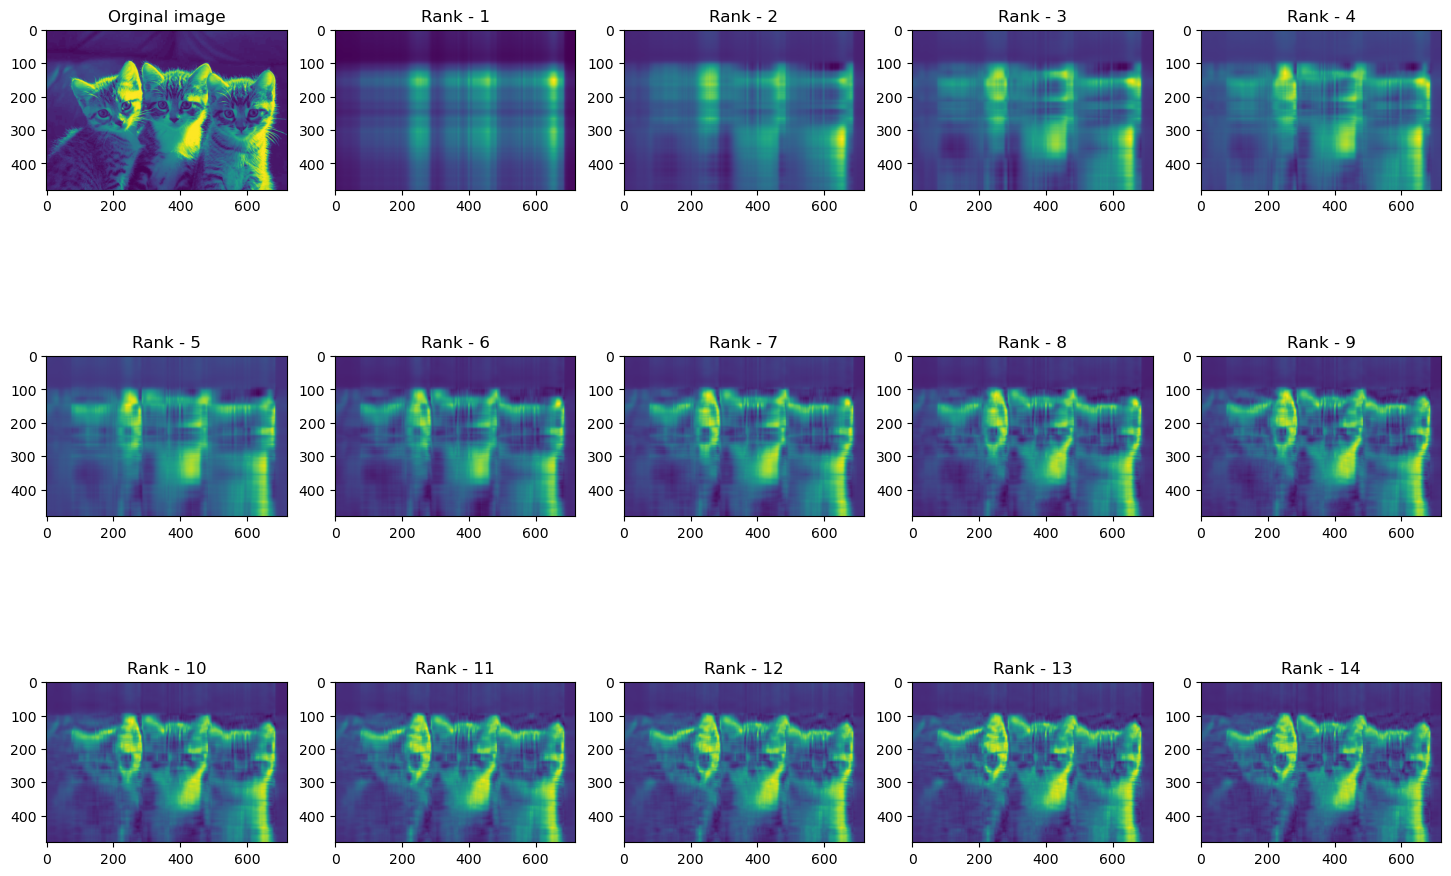

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image


plt.figure(figsize = (18, 12))
image = Image.open("cats.jpg").convert("L")  # Convert to grayscale
A = np.array(image, dtype=np.float32)

U, S, VT = np.linalg.svd(A)

plt.subplot(3, 5, 1)
plt.imshow(A)
plt.title("Orginal image")

for k in range(1, 15):
    u_k = U[:, :k]
    s_k = np.diag(S[:k])
    v_k = VT[:k, :]
    A_k = u_k @ s_k @ v_k
    plt.subplot(3, 5, k + 1)
    plt.imshow(A_k)
    plt.title(f"Rank - {k}")


